In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_excel('regresion.xlsx')
df1

,X,Y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       8 non-null      int64
 1   Y       8 non-null      int64
dtypes: int64(2)
memory usage: 260.0 bytes


In [ ]:
df1.describe()

,X,Y
count,8.000000,8.00000
mean,3.375000,4.37500
std,1.685018,1.59799
min,1.000000,2.00000
25%,2.000000,3.75000
50%,3.500000,4.00000
75%,4.250000,5.25000
max,6.000000,7.00000


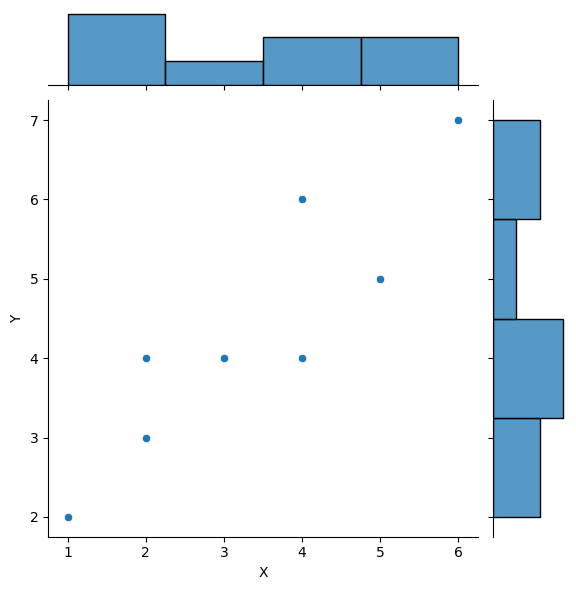

In [ ]:
sns.jointplot(x="X", y="Y", data=df1)

In [ ]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df1[["X"]]
y = df1["Y"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(6, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [0.91304348], el intersecto (A) es 1.456521739130435


Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

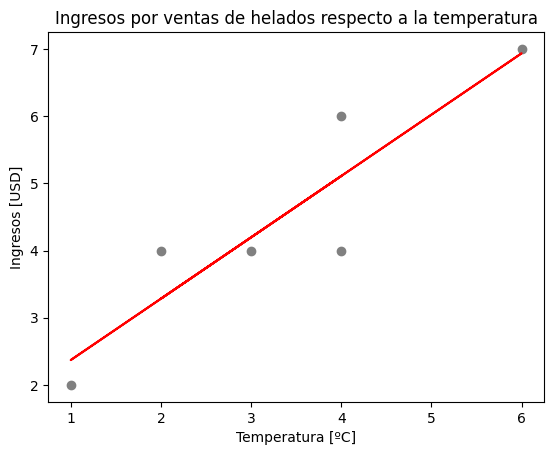

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

In [ ]:
error = y_test - y_pred
print(error)

6   -1.021739
1   -0.282609
Name: Y, dtype: float64


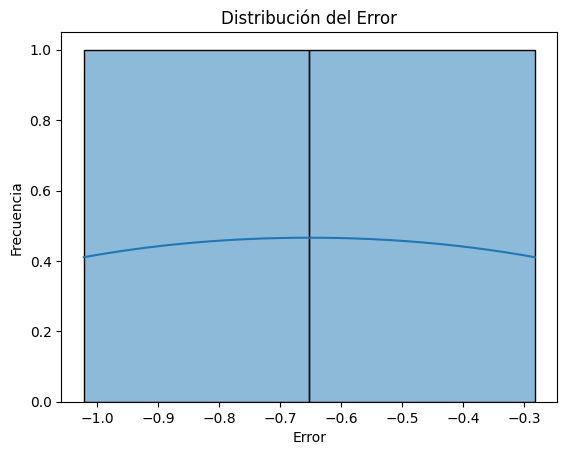

In [ ]:
sns.histplot(error, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error')
plt.show()